## Short Answer  
Please answer each of the following questions with **at least 2-3 complete sentences**. 

1. Why do we use a validation dataset during training, and what can the performance between the validation dataset and the training set tell us?

A validation set is used to make sure that the data is running properly. It takes a certain percentage of a dataset to test to see the accuracy and loss of the dataset. Comparing it to the training set allows the training set to see the mistakes it may have made.

2. What is the major difference between a fully-connected layer and a convolutional layer in terms of the scale of patterns they look for in their input?

The difference in what the layers look for is determined by the detail of the feature. A convolutional layer would look for simple features such as lines. A fully-connected layer would have had more training, so they can determine the outline of an object instead of looking for a single vertical line.

3. If you performed 128 convolutions with filter size 3x3 and a stride of 1 on an input that is 100x100x64 and padded the inputs, what would the output shape be of this layer? 

98x98x62

4. Matrix A has a shape of 250x200 and matrix B has a shape of 250x100. Can you perform a matrix multiplication between A and B in that order without performing any other operations first (True or False)?

False, when doing matrix multiplication the numbers on the inside have to be the same. A matrix of 200x250 and 250x100 would work because they have 250 in common. However, no other operations have been done and the matrices are 250x200 and 250x100 so it would not work.

5. Matrix A has a shape of 3x5 and matrix B has a shape of 3x5. Can these two matrices be added together elementwise (True or False)?

True, similarly shaped matrices can be added together. Matrix A and B have the same shape here, 3x5. This means that each value in the matrix can match up with a value in the other matrix to be added together.

In [0]:
try:
  import tflearn
except ImportError:
  !pip3 install -q tflearn
  import tflearn

In [0]:
import numpy as np
import os
from google.colab import drive
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d
from tflearn.activations import relu
from tflearn.layers.normalization import batch_normalization as bn
from tflearn.layers.estimator import regression
from tflearn.data_utils import to_categorical
import matplotlib.pyplot as plt

In the line below, create a matrix full of zeros with 90 rows and 50 columns. Then print the row with index 5 in this matrix.

In [0]:
matrix1 = np.zeros([90,50])

In [36]:
print (matrix1[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [4]:
# load in the flowers dataset
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(100, 100))

100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!


In the line below, print the shapes of the data and labels. These shapes will help you later when defining the network.

In [123]:
print(X.shape, Y.shape)

(1360, 100, 100, 3) (1360, 17)


Below, show the image with index 500 in the dataset X. 



(I didn't know how to do this part)

In [0]:
random_img = X[500, ...] # take the 100th image from the dataset
weight_filter = np.random.randn(5, 5, 3)  # make random weights
output_feature_map = np.zeros([random_img.shape[0], random_img.shape[1]])  # create empty feature map

In [0]:
for i in range(random_img.shape[0]-5):  # loop through rows
  for j in range(random_img.shape[0]-5):  # loop through columns
    output_feature_map[i, j] = np.sum(weight_filter * random_img[i:i+5, j:j+5, :]) # weighted sum

In [139]:
print(np.amax(output_feature_map), np.amin(output_feature_map))

16.98806754503314 -20.348689386104894


In [0]:
output_feature_map = bytescale(output_feature_map)

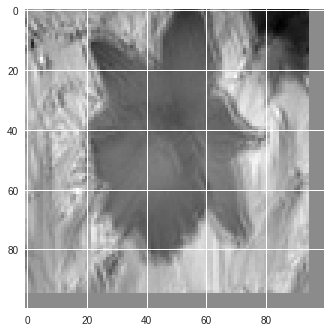

In [141]:
plt.imshow(output_feature_map, cmap='gray')

In [0]:
output_feature_map = np.int32(output_feature_map > 0) * output_feature_map

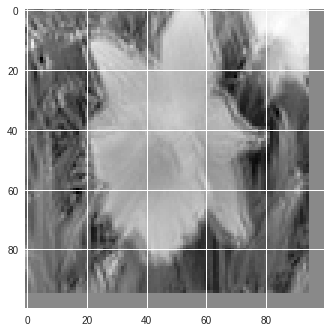

In [143]:
plt.imshow(np.float32(output_feature_map))

In the line below, plot a histogram of X using an appropriate number of bins.

(array([4.010000e+02, 2.356000e+03, 4.582000e+03, 1.103400e+04,
        2.014700e+04, 3.031500e+04, 4.089300e+04, 5.369000e+04,
        6.850000e+04, 8.837800e+04, 1.147590e+05, 1.586320e+05,
        2.330690e+05, 3.123710e+05, 3.945610e+05, 4.782730e+05,
        5.160910e+05, 5.627140e+05, 7.333670e+05, 1.034925e+06,
        1.351486e+06, 1.316722e+06, 1.266937e+06, 1.224142e+06,
        1.196591e+06, 1.167090e+06, 1.145901e+06, 1.117146e+06,
        1.097335e+06, 1.075081e+06, 1.048821e+06, 1.027340e+06,
        1.001864e+06, 9.737770e+05, 9.455690e+05, 9.216710e+05,
        8.937940e+05, 8.681300e+05, 8.422520e+05, 8.188070e+05,
        7.916680e+05, 7.666870e+05, 7.393560e+05, 7.148610e+05,
        6.909170e+05, 6.686910e+05, 6.469350e+05, 6.256560e+05,
        6.050690e+05, 5.883230e+05, 5.712460e+05, 5.501700e+05,
        5.268320e+05, 5.116680e+05, 4.915690e+05, 4.738800e+05,
        4.542830e+05, 4.361820e+05, 4.022580e+05, 3.686910e+05,
        3.363370e+05, 3.004110e+05, 2.76

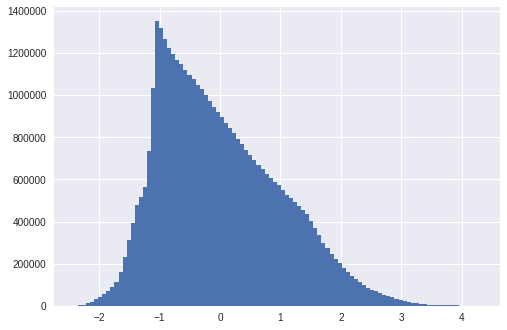

In [144]:
plt.hist(X.flatten(), bins=100)

In the line below, normalize the images by subtracting the mean and dividing by the standard deviation of every pixel. 

In [0]:
X -= np.mean(X, 0)
X /= np.std(X, 0)

You will now create a convolutional neural network to predict the flower species from the images. In the line below, create an input layer for the network based on the shape of the images. 

In [0]:
import tensorflow as tf

In [0]:
tf.reset_default_graph()

In [0]:
from tflearn.data_augmentation import ImageAugmentation

In [0]:
# augment images 
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()  # randomly flip some images left to right
img_aug.add_random_rotation(max_angle=33.)  # randomly rotate images up to 33 degrees
img_aug.add_random_crop((150, 150), padding=15)  # randomly crop a 120 x 120 frame out of images

In [0]:
in_layer = input_data(shape=[None, 150, 150, 3], data_augmentation=img_aug)

In the line below, finish the line and create a convolutional layer to take in the input layer and slide 64 filters with shape 7x7 around it using the relu activation function. You might find the documentation for the conv_2d function helpful: http://tflearn.org/layers/conv/

In [0]:
conv1 = conv_2d(in_layer, 64, 7, activation='linear', name='c1')

In the line below, I have created a second convolutional layer which will take in the first convolutional layer's feature maps as input. Write a comment to indicate 1) how many filters this layer has, 2) what the filter size is, and 3) what the height and width of each output feature map should be based on the stride.

In [0]:
# 128
# 3x3
# 12x12?
conv2 = conv_2d(conv1, 128, 3, activation='relu', strides=4)

In the line below, replace the question marks with appropriate values, keeping in mind this will be the output layer of the network.

In [0]:
output_layer = fully_connected(conv2, 17, activation='softmax')

In the line below, remove the question mark and replace it with an appropriate value for the learning rate.

In [0]:
opt = regression(output_layer, optimizer='adam', learning_rate=.001, loss='categorical_crossentropy')

You don't need to do anything for the line below. 

In [0]:
model = tflearn.DNN(opt)

In the line below, replace each question mark with appropriate values and write a comment next to each line describing what it does (you only need to comment the lines I write *comment here* after.).

In [159]:
model.fit(X, # input data
          Y, # corresponding labels
          validation_set=0.1, # use 10% for validation
          show_metric=True, # show validation accuracy/loss in tensorboard
          n_epoch=10,  # goes through dataset 10 times
          batch_size=75,  # go through dataset 75 examples at a time
          snapshot_step=200)

---------------------------------
Run id: 5TFLGR
Log directory: /tmp/tflearn_logs/
---------------------------------
Training samples: 1224
Validation samples: 136
--


Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tflearn/data_flow.py", line 191, in fill_feed_dict_queue
    data[k] = self.daug_dict[k].apply(data[k])
  File "/usr/local/lib/python3.6/dist-packages/tflearn/data_augmentation.py", line 38, in apply
    batch = m(batch, *self.args[i])
  File "/usr/local/lib/python3.6/dist-packages/tflearn/data_augmentation.py", line 186, in _random_crop
    nh = random.randint(0, oshape[0] - crop_shape[0])
  File "/usr/lib/python3.6/random.py", line 221, in randint
    return self.randrange(a, b+1)
  File "/usr/lib/python3.6/random.py", line 199, in randrange
    raise ValueError("empty range for randrange() (%d,%d, %d)" % (istart, istop, width))
ValueError: empty range for randrange() (0,-19, -19)



KeyboardInterrupt: ignored

Download this notebook and upload it to your branch on the class github. 

In [130]:
model.save('Midterm_Exam')

INFO:tensorflow:/content/Midterm_Exam is not in all_model_checkpoint_paths. Manually adding it.
